In [2]:
import numpy as np
import pandas as pd
import cv2
from random import shuffle
import os

In [3]:
TRAIN_DIR = "C:/Users/Chenge/Documents/python/all/train/train"
TEST_DIR = "C:/Users/Chenge/Documents/python/all/test1/test1"

#Parameters
img_shape = 64

In [4]:
def classification(img):
    name = img
    if 'cat' in name:
        category = [1,0]
    elif 'dog' in name:
        category = [0,1]
    return category

def training_images_classification():
    training_images = []
    
    for i in os.listdir(TRAIN_DIR):
        path = os.path.join(TRAIN_DIR,i)
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (img_shape,img_shape))
        training_images.append([np.array(img), classification(i)])
        
    shuffle(training_images)
    
    return training_images



In [5]:
training_images = training_images_classification()


In [6]:
img_data = np.array([i[0] for i in training_images]).reshape([-1,64,64,1])
img_label = np.array([i[1] for i in training_images])

In [7]:
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import *
import keras.backend as K

Using TensorFlow backend.


In [8]:
K.clear_session()
model = Sequential()

In [9]:
model.add(InputLayer(input_shape=[64,64,1]))
model.add(Conv2D(filters=45,kernel_size=7,strides=1,activation='relu'))
#Filters: The number of outputs in the conv #Move 1 (stride) and the space you are going to take is 7x7
model.add(MaxPool2D(pool_size=7, padding='same')) #Get max value every 5x5  move just 1 (stride)

In [10]:
model.add(Conv2D(filters=64,kernel_size=5,strides=1,activation='relu'))
#Filters: The number of outputs in the conv #Move 1 (stride) and the space you are going to take is 7x7
model.add(MaxPool2D(pool_size=7, padding='same')) #Get max value every 5x5  move just 1 (stride)

In [11]:
model.add(Flatten())

In [12]:
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

In [13]:
model.compile(optimizer=Adam(lr=1e-4, decay=1e-6),loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
model.fit(x=img_data, y=img_label,batch_size=32,epochs=25,validation_split=0.15)

Train on 21250 samples, validate on 3750 samples
Epoch 1/25
21250/21250 [==============================] - 81s - loss: 0.8064 - acc: 0.5648 - val_loss: 0.6667 - val_acc: 0.5984
Epoch 2/25
21250/21250 [==============================] - 82s - loss: 0.6582 - acc: 0.6102 - val_loss: 0.6412 - val_acc: 0.6304
Epoch 3/25
21250/21250 [==============================] - 81s - loss: 0.6342 - acc: 0.6420 - val_loss: 0.6268 - val_acc: 0.6605
Epoch 4/25
21250/21250 [==============================] - 81s - loss: 0.6077 - acc: 0.6706 - val_loss: 0.6115 - val_acc: 0.6680
Epoch 5/25
21250/21250 [==============================] - 82s - loss: 0.5793 - acc: 0.6912 - val_loss: 0.5922 - val_acc: 0.6853
Epoch 6/25
21250/21250 [==============================] - 82s - loss: 0.5543 - acc: 0.7163 - val_loss: 0.5609 - val_acc: 0.7083
Epoch 7/25
21250/21250 [==============================] - 81s - loss: 0.5313 - acc: 0.7318 - val_loss: 0.5535 - val_acc: 0.7176
Epoch 8/25
21250/21250 [==============================]

In [15]:
from keras.models import load_model

model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
model = load_model('my_model.h5')


In [16]:
from random import randint
test_images = []
for i in os.listdir(TEST_DIR):
    test_images.append(i)

num = randint(0, len(test_images)-1)
path = os.path.join(TEST_DIR, test_images[num])
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (64,64))    
data = img.reshape(1,64,64,1)
predict = model.predict([data])

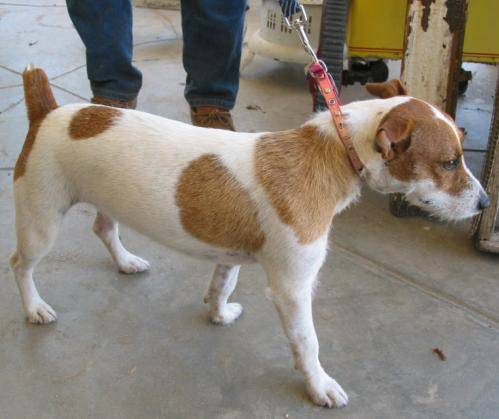

In [17]:
from IPython.display import Image
Image(filename=path) 

In [18]:
if np.argmax(predict) == 1:
    print("Dog")
else:
    print("Cat")

Dog
